# Minor Project-Wine Quality Prediction 
* **Project Description:**<br>
Red Wine Quality Prediction: The dataset consists of different variable like fixed acidity, 
volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, 
density, pH, sulfates, alcohol-based on which the quality is ranked between 0-10 ( 0 is 
considered as of poor quality and above 6 is considered to be a good quality one)
* **Task:**<br> 
Build a model to predict the quality of the wine based on different input variables like 
Fixed acidity content of the wine, residual sugar content, pH values, alcohol content, etc on 
which wine’s quality is dependent.

## Importing required modules

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [2]:
wine_data = pd.read_csv("wine_quality_data.csv")

## Data Preview

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Observations:**
* The highest quality wine is ranked 8 .
* The average quality of wine is 5.6 that is it is between 5-6.

## Checking for null values

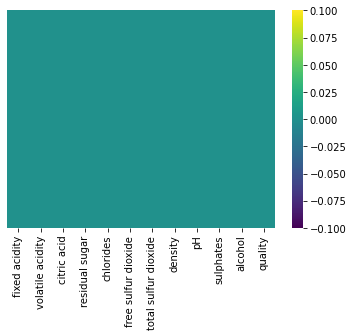

In [6]:
sns.heatmap(wine_data.isnull(),yticklabels=False,cmap='viridis')
plt.show()

As we can see there are no null values in the dataset

## Data Visualization

### Finding correlation

In [7]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


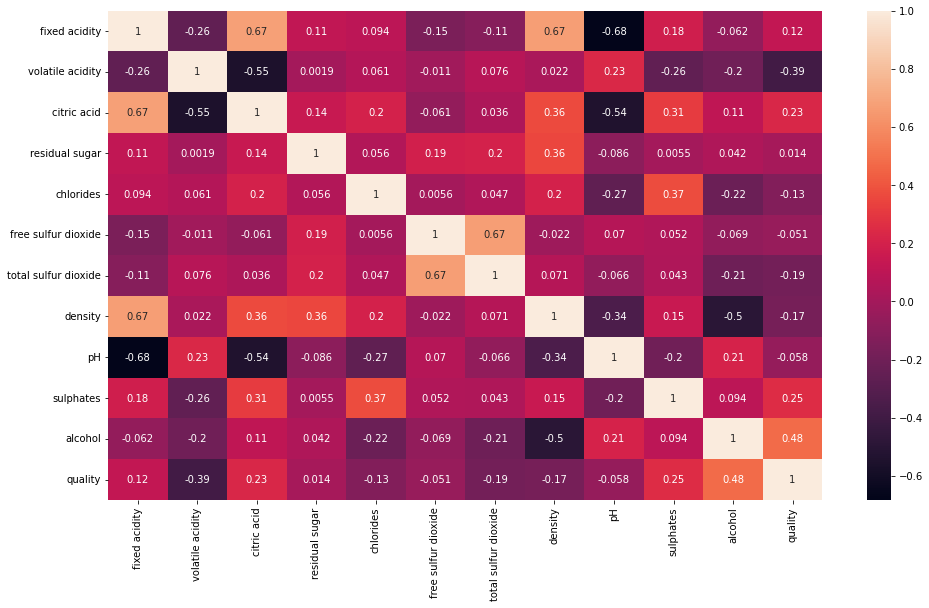

In [8]:
plt.figure(figsize=(16,9))
sns.heatmap(wine_data.corr(),annot=True)
plt.show()

**As we can see some of the features are correlated with each other but their correlation isn't that strong. Thus we do not have to worry about the problem of multi-colinearity**

#### Finding correlation between Quality and other features using Pearson Correlation Coefficient

In [9]:
wine_data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

As we can see alcohol has the strongest positive correlation among the features followed by sulphates present and volatile acidity has the strongest negative correlation among the features with the quality.
But these correlations aren't that strong, i.e. increase/decrease in their value wouldn't have much effect on the quality

### Plotting the data

From the above correlation matrix we can see some of the features do not have any effect on the quality. We can plot the graph only important features which have atleast some effect on the quality.

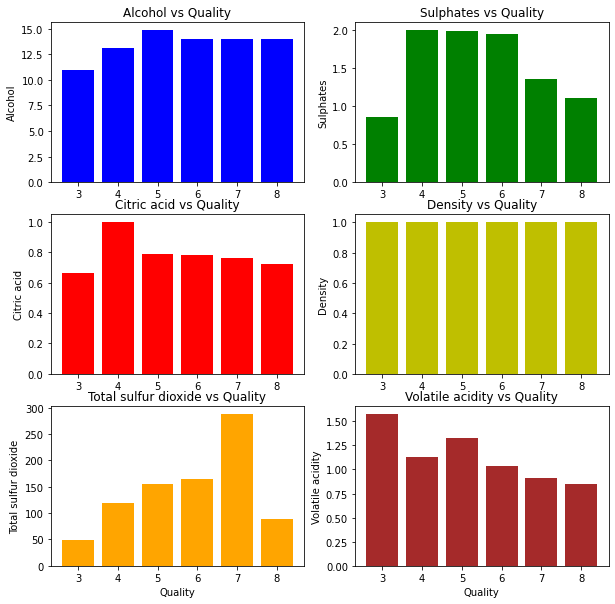

In [10]:
#Alcohol vs Quality
fig,axs = plt.subplots(3,2,figsize=(10,10))
axs[0,0].set_title('Alcohol vs Quality')
axs[0,0].set_ylabel('Alcohol')
axs[0,0].bar(wine_data['quality'],wine_data['alcohol'],color='b')

# Sulphates vs Quality
axs[0,1].set_title('Sulphates vs Quality')
axs[0,1].set_ylabel('Sulphates')
axs[0,1].bar(wine_data['quality'],wine_data['sulphates'],color='g')


# Citric acid vs Quality
axs[1,0].set_title('Citric acid vs Quality')
axs[1,0].set_ylabel('Citric acid')
axs[1,0].bar(wine_data['quality'],wine_data['citric acid'],color='r')


# Density vs Quality
axs[1,1].set_title('Density vs Quality')
axs[1,1].set_ylabel('Density')
axs[1,1].bar(wine_data['quality'],wine_data['density'],color='y')

# Total sulfur dioxide vs Quality 
axs[2,0].set_title('Total sulfur dioxide vs Quality')
axs[2,0].set_ylabel('Total sulfur dioxide')
axs[2,0].set_xlabel('Quality')
axs[2,0].bar(wine_data['quality'],wine_data['total sulfur dioxide'],color='orange')

# Volatile acidity vs Quality
axs[2,1].set_title('Volatile acidity vs Quality')
axs[2,1].set_ylabel('Volatile acidity')
axs[2,1].set_xlabel('Quality')
axs[2,1].bar(wine_data['quality'],wine_data['volatile acidity'],color='brown')

# for ax in axs.flat:
#     ax.set(xlabel='Quality')
# for ax in axs.flat:
#     ax.label_outer()
plt.show()

**Observations:**
1. As Alcohol content is close to 15, Quality also increases but it is the highest when it is on between 12.5 and 15.
2. Quality of wine is highest when sulphate content is from 1 to 1.5.
3. Wine quality starts getting good when citric acid content is between 0.6 and 0.8.
4. Density of wine doesn't affect its quality.
5. Quality of wine increases as total sulphur dioxide content also increase but when the total sulphur dioxide content is in between 50-100, it is considered as the best(8).
6. As volatile acidity increases wine quality decreases. It is best when volatile acidity is in between 0.75-1

## Distinguishing between good and bad quality of wine

### Creating a new column for the classification

In [11]:
wine_data["good_quality"] = [1 if i>6 else 0 for i in wine_data['quality']]

In [12]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Thus, a new column with binary classification of wine quality is created

In [13]:
# Count for good and bad quality wine 
wine_data['good_quality'].value_counts()

0    1382
1     217
Name: good_quality, dtype: int64

## Splitting the data into train and test

* We are applying stratified train test split here so that the "good_quality" binary feature will be split into equal ratio in both training and testing data.
* Thus the machine will learn both 0 and 1 of the "good_quality" feature and not only 0 or 1.

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(wine_data,wine_data['good_quality']):
    strat_train_df = wine_data.iloc[train_index]
    strat_test_df = wine_data.iloc[test_index]

In [16]:
strat_train_df['good_quality'].value_counts()

0    1105
1     174
Name: good_quality, dtype: int64

In [17]:
strat_test_df['good_quality'].value_counts()

0    277
1     43
Name: good_quality, dtype: int64

Thus the binary variables are equally divided between train and test data

## Seperating targets and features

In [18]:
X_train = strat_train_df.drop(['good_quality','quality'],axis=1)
X_test = strat_test_df.drop(['good_quality','quality'],axis=1)
y_train = strat_train_df['good_quality']
y_test = strat_test_df['good_quality']

## Feature Scaling
Feature Scaling is used to transform data in different scales into same scale

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scalar = StandardScaler()

In [21]:
# Applying StandardScaler on both training and testing data
scalar.fit_transform(X_train)
scalar.fit_transform(X_test)

array([[ 1.23253894e+00, -6.68280401e-01,  1.45512766e+00, ...,
        -1.01129390e+00,  1.36828628e+00, -4.39809942e-01],
       [-1.75797947e-02,  2.02133146e-01,  9.40207408e-04, ...,
        -6.50539935e-02, -1.25460395e+00, -2.42142552e-01],
       [-8.13109898e-01,  7.46141613e-01, -1.30281406e+00, ...,
         5.65772610e-01,  5.12995991e-01, -6.37477331e-01],
       ...,
       [-8.13109898e-01,  5.82939073e-01, -8.01370114e-01, ...,
         1.87276648e-01, -7.41429773e-01, -1.43308857e-01],
       [-8.69933477e-01,  1.23574923e+00, -1.20252527e+00, ...,
         1.51201252e+00, -1.14216891e-01, -3.90393094e-01],
       [ 2.31218694e+00, -1.78672781e-01,  1.15426129e+00, ...,
        -7.58963257e-01, -1.19758460e+00, -7.36311026e-01]])

## Model Training

1. **Logistic Regresion**

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred_log_reg = log_reg.predict(X_test)

2. **Decision Tree Classifier**

In [23]:
from sklearn.tree import DecisionTreeClassifier
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train,y_train)
y_pred_dec_clf = dec_clf.predict(X_test)

3. **Random Forest Classifier**

In [24]:
from sklearn.ensemble import RandomForestClassifier
randf_clf = RandomForestClassifier()
randf_clf.fit(X_train,y_train)
y_pred_randf_clf = randf_clf.predict(X_test)

## Checking for accuracy

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
# Function for accuracy checking
def accuracy(est,y_pred_val):
    print("Training accuracy:",est.score(X_train,y_train))
    print("Testing accuracy:",est.score(X_test,y_test))
    print(classification_report(y_test,y_pred_val))
    print(confusion_matrix(y_test,y_pred_val))

### Checking accuracy for models

In [27]:
#Logistic Regression
accuracy(log_reg,y_pred_log_reg)

Training accuracy: 0.8795934323690383
Testing accuracy: 0.878125
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       277
           1       0.64      0.21      0.32        43

    accuracy                           0.88       320
   macro avg       0.77      0.60      0.62       320
weighted avg       0.86      0.88      0.85       320

[[272   5]
 [ 34   9]]


In [28]:
# Decision Tree Classifier
accuracy(dec_clf,y_pred_dec_clf)

Training accuracy: 1.0
Testing accuracy: 0.9
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       277
           1       0.62      0.65      0.64        43

    accuracy                           0.90       320
   macro avg       0.78      0.79      0.79       320
weighted avg       0.90      0.90      0.90       320

[[260  17]
 [ 15  28]]


In [29]:
# Random Forest Classifier
accuracy(randf_clf,y_pred_randf_clf)

Training accuracy: 1.0
Testing accuracy: 0.93125
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       277
           1       0.82      0.63      0.71        43

    accuracy                           0.93       320
   macro avg       0.88      0.80      0.84       320
weighted avg       0.93      0.93      0.93       320

[[271   6]
 [ 16  27]]


### We can see that the model with Random Forest Classifier has the highest accuracy. Thus we can use it to predict the quality of wine.

## Saving the model using joblib
We will be using model with Random Forest Classifier as it is the best model

In [30]:
from joblib import dump,load

In [31]:
dump(randf_clf,"Wine_Quality.joblib")

['Wine_Quality.joblib']

Using this, another file only for model usage can be created

## Model Usage file

In [32]:
from Model_usage import model_usage

In [33]:
model_usage()

Features: [[ 8.       0.38     0.06     1.8      0.078   12.      49.       0.99625
   3.37     0.52     9.9    ]]
Prediction: [0]


**This is how, wine quality can be predicted(features given), using only model usage file**

## Conclusion: Thus this model can predict whether the wine quality is good or bad if the above mentioned features are given

# Thank you